# Box Office Revenue Prediction


In [4]:
# Import Libraries

import numpy as np
import pandas as pd
from pandas import DataFrame as df
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


# Handling Duplicate and Missing Values

In [6]:

# Read CSV File

data = pd.read_csv("/Users/ratnadeepgurav/Desktop/NeuAi_Internship/Project/Data/Top 1000 Bollywood Movies and their boxoffice.csv")

#Drop duplicate entry from id 

print(data.drop_duplicates('SN'))

# Count Duplicate Value

print("\n\n Count of Duplicates value :- ",data['Worldwide'].duplicated().sum(),"\n\n")

#Count Null Values

print("Count of Null values :- \n",data.isnull().sum(),"\n\n")

# Drop Columns

columns_to_remove = ['Unnamed: 0','SN']

cleaned_data =data.drop(columns=columns_to_remove)

print(cleaned_data)


cleaned_data.replace(0,'')



     Unnamed: 0    SN                       Movie    Worldwide   India Net  \
0             0     1                     Pathaan  10500000000  5240000000   
1             1     2  Baahubali 2 The Conclusion  17880000000  5100000000   
2             2     3               KGF Chapter 2  12080000000  4350000000   
3             3     4                      Dangal  20700000000  3740000000   
4             4     5                       Sanju   5880000000  3420000000   
..          ...   ...                         ...          ...         ...   
995         995   996                     Nikamma            0    20000000   
996         996   997                    Saugandh     30000000    20000000   
997         997   998                 Akaash Vani     30000000    20000000   
998         998   999                     Zwigato     10000000    20000000   
999         999  1000                      FryDay     20000000    20000000   

     India Gross     Overseas      Budget               Verdict

,Movie,Worldwide,India Net,India Gross,Overseas,Budget,Verdict
0,Pathaan,10500000000,5240000000,6570000000,3920000000,2500000000,All Time Blockbuster
1,Baahubali 2 The Conclusion,17880000000,5100000000,14160000000,3710000000,2500000000,All Time Blockbuster
2,KGF Chapter 2,12080000000,4350000000,10000000000,2070000000,1000000000,All Time Blockbuster
3,Dangal,20700000000,3740000000,5350000000,15350000000,700000000,All Time Blockbuster
4,Sanju,5880000000,3420000000,4380000000,1500000000,1000000000,All Time Blockbuster
...,...,...,...,...,...,...,...
995,Nikamma,,20000000,20000000,,10000000,0
996,Saugandh,30000000,20000000,30000000,,20000000,Average
997,Akaash Vani,30000000,20000000,20000000,,100000000,Disaster
998,Zwigato,10000000,20000000,10000000,,10000000,0


# Save the Cleaned Dataset

In [8]:
cleaned_data.to_csv("cleaned_data.csv", index=False)


# Select features and target for regression

In [27]:

x = df(data, columns=['Budget'])
y = df(data, columns=['Worldwide'])

regression = LinearRegression()
regression.fit(x,y)

print("\n\n Coeff :- ",regression.coef_,"\n\n")
print("Intercept :- ",regression.intercept_,"\n\n")

regression.coef_ * 2500000000 + regression.intercept_



 Coeff :-  [[4.11933796]] 


Intercept :-  [-5.93008127e+08] 




array([[9.70533678e+09]])

# Shows mean, median, min, max, and more

In [33]:
print(data.describe(),"\n\n")  
print(data.info()) 

        Unnamed: 0           SN     Worldwide     India Net   India Gross  \
count  1000.000000  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03   
mean    499.500000   500.500000  1.832870e+09  4.079600e+08  6.126900e+08   
std     288.819436   288.819436  1.049006e+10  5.783055e+08  9.814085e+08   
min       0.000000     1.000000  0.000000e+00  2.000000e+07  0.000000e+00   
25%     249.750000   250.750000  1.600000e+08  9.000000e+07  1.400000e+08   
50%     499.500000   500.500000  3.700000e+08  2.000000e+08  3.100000e+08   
75%     749.250000   750.250000  9.025000e+08  4.600000e+08  6.825000e+08   
max     999.000000  1000.000000  1.897000e+11  5.240000e+09  1.416000e+10   

           Overseas        Budget  
count  1.000000e+03  1.000000e+03  
mean   9.714300e+08  5.889000e+08  
std    8.596981e+09  2.101992e+09  
min    0.000000e+00  0.000000e+00  
25%    1.000000e+07  8.000000e+07  
50%    5.000000e+07  2.000000e+08  
75%    1.500000e+08  4.000000e+08  
max    1.690200e+1

# Visualize Data Relationships

# Scatter Plot 

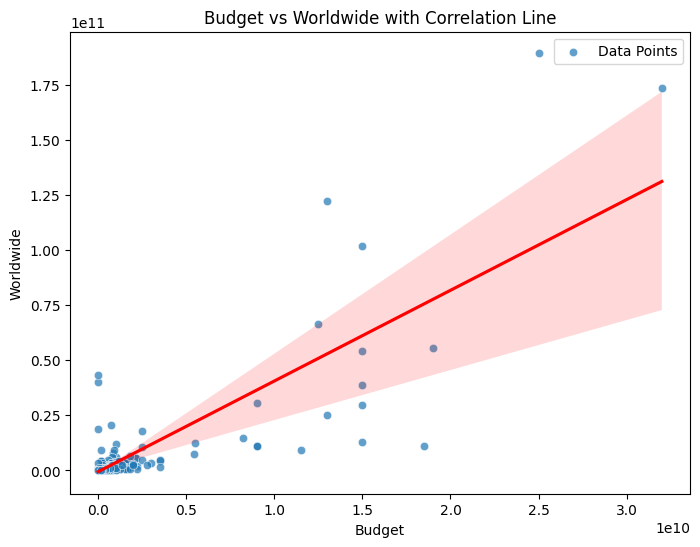

In [44]:
# Scatter plot with a correlation line
plt.figure(figsize=(8, 6))

# Create scatter plot and add a label for legend
sns.scatterplot(x='Budget', y='Worldwide', data=data, alpha=0.7, label='Data Points')

# Add a regression line (correlation line) with a label
sns.regplot(x='Budget', y='Worldwide', data=data, scatter=False, color='red', 
            line_kws={"label": "Correlation Line"})

# Add labels and title
plt.title('Budget vs Worldwide with Correlation Line')
plt.xlabel('Budget')
plt.ylabel('Worldwide')

# Display the legend with the labels provided
plt.legend(loc='best')

plt.show()

# Heatmap

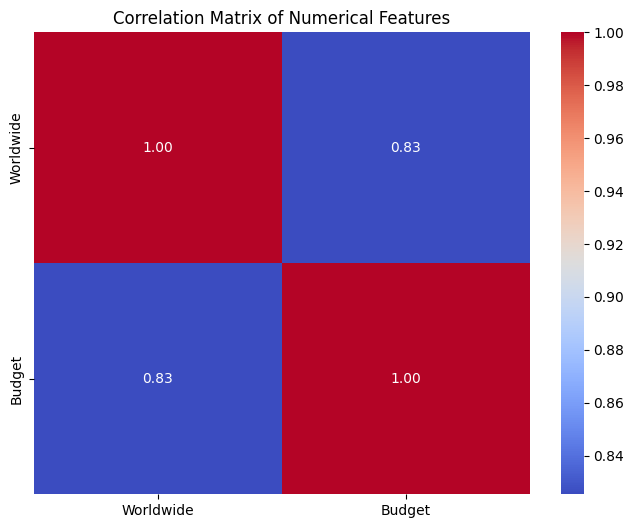

In [29]:
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Worldwide', 'Budget']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Distribution Plot - Revenue (Popularity)

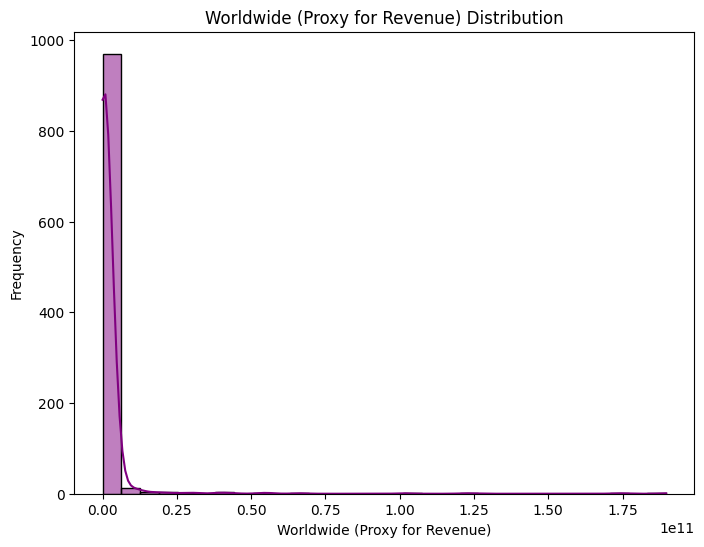

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Worldwide'], bins=30, kde=True, color='purple')
plt.title("Worldwide (Proxy for Revenue) Distribution")
plt.xlabel("Worldwide (Proxy for Revenue)")
plt.ylabel("Frequency")
plt.show()

# Box Plot - Budget by Genre (Parsing 'genre_names')
# Extract the primary genre (first genre in the list) for each movie



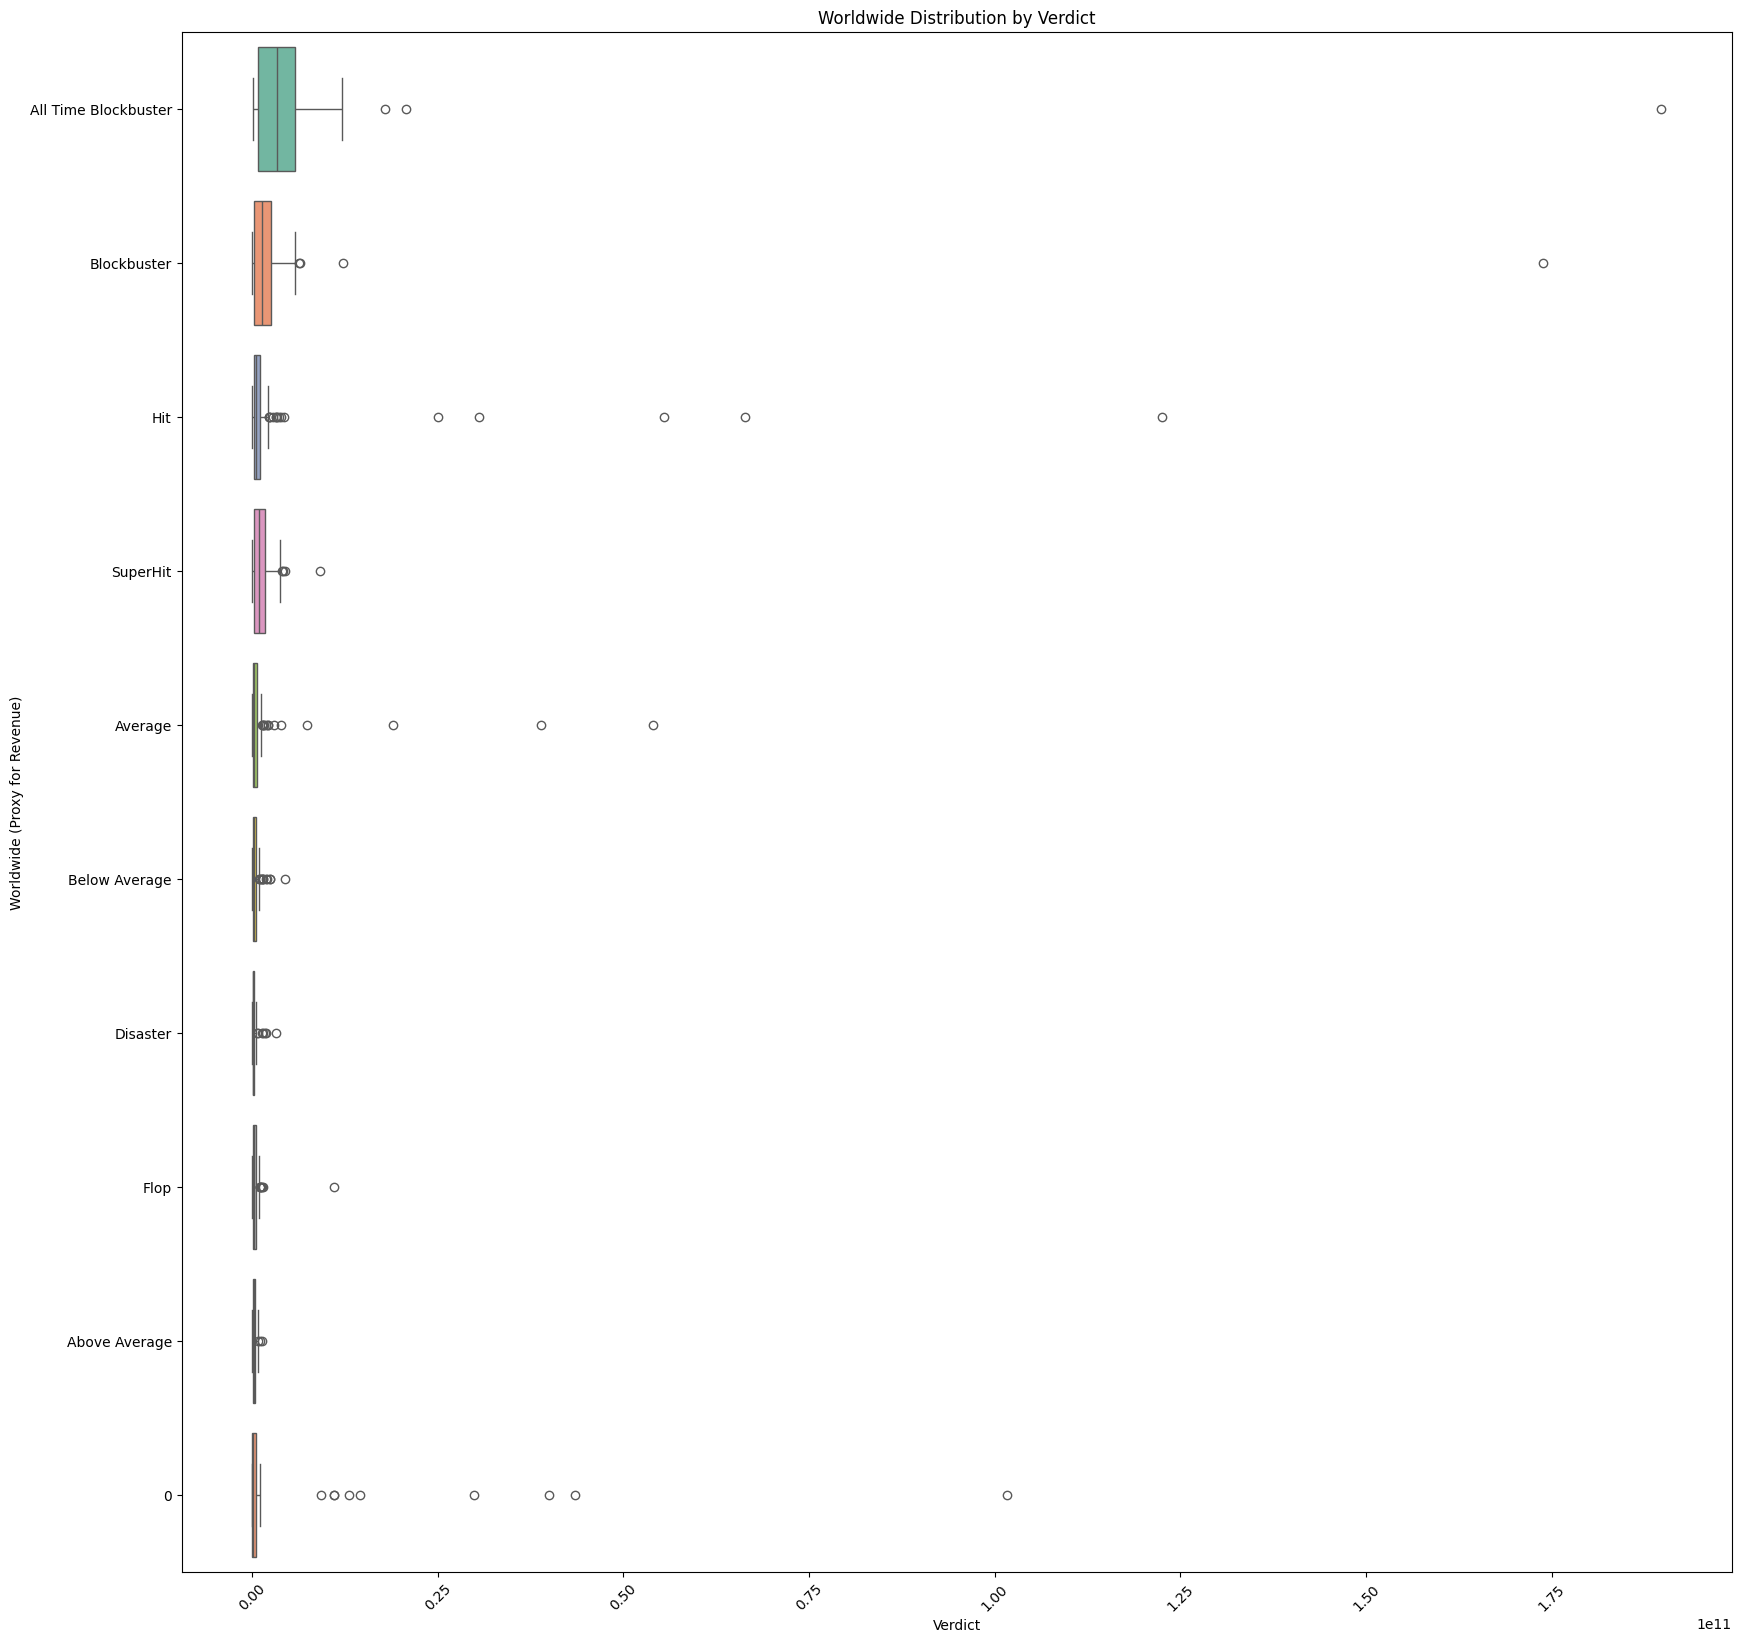

In [40]:
# Use the existing 'Verdict' column (no need to compute it from 'Movie')
plt.figure(figsize=(20, 20))

# Create a box plot for 'Worldwide' revenue by 'Verdict'
sns.boxplot(y='Verdict', x='Worldwide', data=data, hue='Verdict', palette="Set2", dodge=False)

# Set the title and axis labels
plt.title("Worldwide Distribution by Verdict")
plt.xlabel("Verdict")
plt.ylabel("Worldwide (Proxy for Revenue)")
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [41]:
print("Dataset columns:", data.columns.tolist())


Dataset columns: ['Unnamed: 0', 'SN', 'Movie', 'Worldwide', 'India Net', 'India Gross', 'Overseas', 'Budget', 'Verdict']
